In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/Sreemanto/DSP-55/main/Premier_League_Table.csv')
df

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,16,West Ham,38,10,9,19,49,62,39,44155,Michail Antonio - 10,Łukasz Fabiański,2020
496,17,Aston Villa,38,9,8,21,41,67,35,28505,Jack Grealish - 8,Tom Heaton,2020
497,18,Bournemouth,38,9,7,22,40,65,34,7745,Callum Wilson - 8,Aaron Ramsdale,2020
498,19,Watford,38,8,10,20,36,64,34,15353,Troy Deeney - 10,Ben Foster,2020


In [12]:
df.shape

(500, 13)

In [13]:
df['GD'] = df['GF'] - df['GA']

In [16]:
df.shape

(500, 14)

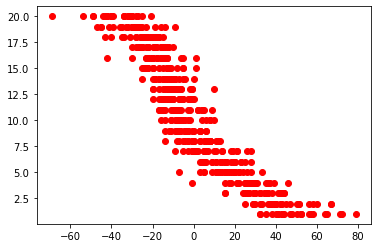

In [17]:
plt.scatter(df['GD'],df['Rk'],c='red')
plt.show()

In [21]:
df['GD'].shape

(500,)

In [28]:
x = np.array(df['GD'])
x

array([ 38,  29,  36,  17,  17,  20,  14,  12,  -4,  -9,   2, -15, -17,
       -15, -13, -18, -18, -25, -19, -32,  32,  33,  30,  25,  13,   3,
        -1,   3,  -8,  -7, -10, -13,  -1,  -9, -13,  -6, -16, -18,  -9,
       -28,  35,  47,  26,  28,  11,   5,   1,  -1,   3,  10,   2,  -5,
        -9, -12, -12, -15, -15, -20, -45, -34,  43,  42,  27,  28,  -7,
         5,  19,  -5,  -6,  -6,  -3,  -1,  -6,  -5, -12, -23, -27, -15,
       -14, -34,  52,  30,  15,  21,  19,  11,   1,   0,  -1,   8,   9,
        -6,  10,  -7, -17, -13, -30, -28, -32, -42,  48,  25,  32,  21,
        15,  23,   5,   3,  -7,  -8,  -6,  -7, -12,   0,  -5, -14, -22,
       -24, -27, -40,  43,  37,  42,  22,  16,  28,  -9,  -1,  -4,   4,
        -8, -12,  -8, -11, -12, -18, -22, -23, -30, -34,  40,  43,  15,
        30,  20,   9,  -1,  -3,  -7, -11,   4, -11,  -8,  -9,   1,  -5,
       -10, -17, -36, -44,  47,  37,  29,  18,  12,   4,   0,  -8,   6,
        -5,  -8,  -1,  -7, -10,  -8,   1, -12, -17, -39, -39,  5

In [30]:
x = x.reshape(500,1)
x.shape

(500, 1)

In [36]:
LM = LinearRegression()

In [37]:
LM.fit(x,df['Rk'])

LinearRegression()

In [38]:
intercept = LM.intercept_
slope = LM.coef_

print(intercept)
print(slope)

10.5
[-0.21341188]


In [43]:
y_predicted = intercept + slope*(x)

In [44]:
y_predicted

array([[ 2.39034838],
       [ 4.31105535],
       [ 2.81717215],
       [ 6.87199796],
       [ 6.87199796],
       [ 6.23176231],
       [ 7.51223361],
       [ 7.93905738],
       [11.35364754],
       [12.42070696],
       [10.07317623],
       [13.70117827],
       [14.12800204],
       [13.70117827],
       [13.2743545 ],
       [14.34141392],
       [14.34141392],
       [15.83529712],
       [14.55482581],
       [17.32918031],
       [ 3.67081969],
       [ 3.45740781],
       [ 4.09764346],
       [ 5.16470288],
       [ 7.7256455 ],
       [ 9.85976435],
       [10.71341188],
       [ 9.85976435],
       [12.20729508],
       [11.99388319],
       [12.63411885],
       [13.2743545 ],
       [10.71341188],
       [12.42070696],
       [13.2743545 ],
       [11.78047131],
       [13.91459015],
       [14.34141392],
       [12.42070696],
       [16.47553277],
       [ 3.03058404],
       [ 0.46964142],
       [ 4.951291  ],
       [ 4.52446723],
       [ 8.15246927],
       [ 9

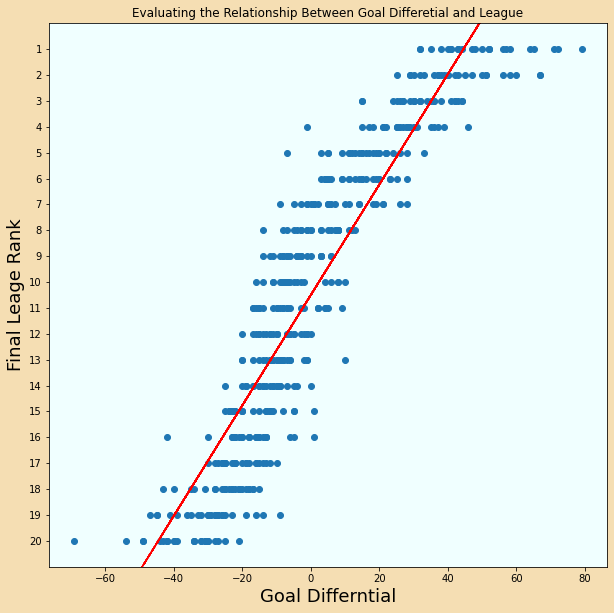

In [58]:
fig,ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('wheat')
ax.patch.set_facecolor('azure')

# plot data
plt.scatter(x,df['Rk'])
plt.plot(x,y_predicted, c='red',linestyle='--')
plt.ylim(0,21) # I want to have a specified limit for the range of y-axis values
plt.gca().invert_yaxis() # I want the Ranked 1 team to be at top
plt.yticks(np.arange(1,21)) # fixing the point axis
plt.xlabel('Goal Differntial',fontsize = 18)
plt.ylabel('Final Leage Rank',fontsize = 18)
plt.title('Evaluating the Relationship Between Goal Differetial and League')
plt.show()

In [70]:
y_train = df[df['Year']!='2020'].Rk
x_train = df[df['Year']!='2020'].GD.values.reshape(-1,1)


In [71]:
y_test = df[df['Year'] == 2020].Rk
x_test = df[df['Year'] == 2020].GD.values.reshape(-1,1)

In [73]:
LM_model = LinearRegression()
LM_model.fit(x_train,y_train)

LinearRegression()

In [75]:
intercept = LM_model.intercept_
slope = LM_model.coef_
print(intercept)
print(slope)

10.5
[-0.21341188]


In [77]:
y_pred = LM_model.predict(x_test)
y_pred[0:5]

array([-0.597418  , -3.79859627,  4.09764346,  7.29882173,  4.951291  ])

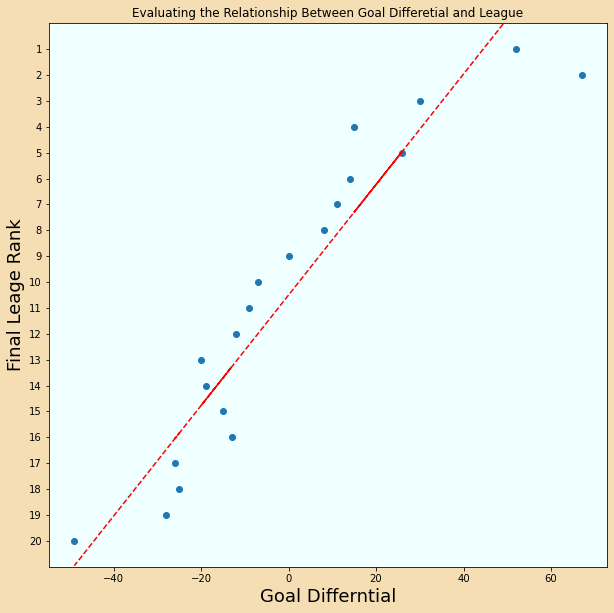

In [78]:
fig,ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('wheat')
ax.patch.set_facecolor('azure')

# plot data
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred, c='red',linestyle='--')
plt.ylim(0,21) # I want to have a specified limit for the range of y-axis values
plt.gca().invert_yaxis() # I want the Ranked 1 team to be at top
plt.yticks(np.arange(1,21)) # fixing the point axis
plt.xlabel('Goal Differntial',fontsize = 18)
plt.ylabel('Final Leage Rank',fontsize = 18)
plt.title('Evaluating the Relationship Between Goal Differetial and League')
plt.show()